# 파생변수 추가 [유동인구분류]

연령별 유동인구와 사고와의 연관성을 시각화해 본 결과 노인인구를 제외한 특정 사고에 대하서 유동인구가 크게 영향을 주지 않으므로 65세 미만 유동인구와 65세 이상의 노인 유동인구로 파생변수 수정

## 65세 미만의 유동인구 추가

In [ ]:
# 65세 미만 유동인구
all_pop_list = []
all_pop = data_DF.loc[:, "GRID_ID":"F70"]
male_pop_sum = all_pop.loc[:, "M00":"M60"].sum(axis=1)
female_pop_sum = all_pop.loc[:, "F00":"F60"].sum(axis=1)
all_pop_sum = pd.concat([male_pop_sum, female_pop_sum], axis=1)
for i in range(len(all_pop_sum)):
  all_pop_list.append(all_pop_sum.at[i, 0] + all_pop_sum.at[i, 1])
all_pop_sum_df = pd.DataFrame(all_pop_list, columns = ["ALL_POP"])
all_pop_df = pd.concat([all_pop["GRID_ID"], all_pop_sum_df], axis=1)
all_pop_df 

,GRID_ID,ALL_POP
0,378509,4.32
1,378509,0.00
2,378509,0.00
3,378509,0.00
4,378509,0.00
...,...,...
153420,418518,0.00
153421,418518,0.00
153422,418518,0.00
153423,418518,0.00


In [ ]:
# 전체 유동인구 파생변수 기존 DF에 합치기
data_DF = pd.concat([data_DF, all_pop_df["ALL_POP"]], axis=1).reset_index(drop=True)

## 65세 이상의 노인인구 추가

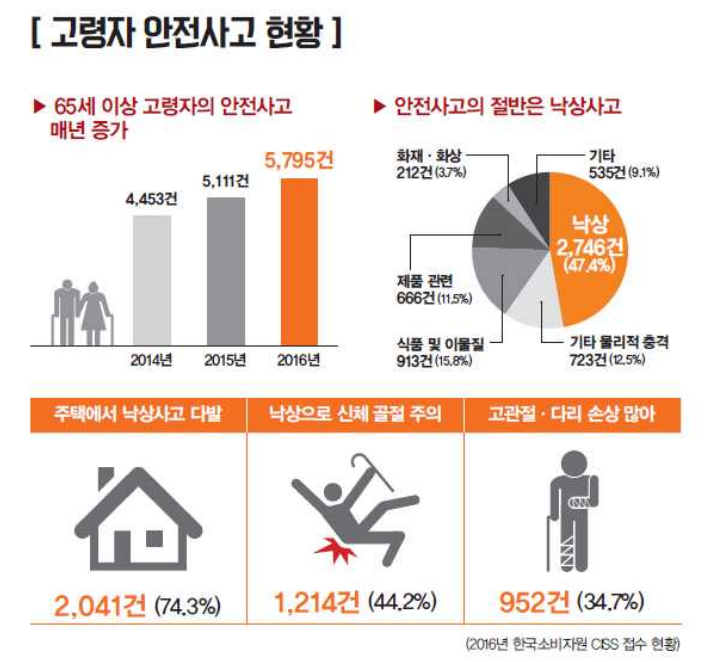

In [ ]:
# 65세 이상의 노인 유동인구 파생변수 생성
elder_pop = data_DF.loc[:, ["GRID_ID", "M65", "M70", "F65", "F70"]]
elder_pop_sum = elder_pop.loc[:, "M65":].sum(axis=1)
elder_pop_df = pd.concat([elder_pop["GRID_ID"], elder_pop_sum], axis=1).rename(columns={0 : "ELDER_POP"})
elder_pop_df

,GRID_ID,ELDER_POP
0,378509,0.9
1,378509,0.0
2,378509,0.0
3,378509,0.0
4,378509,0.0
...,...,...
153420,418518,0.0
153421,418518,0.0
153422,418518,0.0
153423,418518,0.0


In [ ]:
# 65세 이상의 노인 유동인구 파생변수 기존 DF에 합치기
data_DF = pd.concat([data_DF, elder_pop_df["ELDER_POP"]], axis=1).reset_index(drop=True)
data_DF

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,AVRG_HUMIDITY,TOTAL_CNT,INDUSTRIAL_CNT,BAR_CNT,SENIOR_CENTER_CNT,RESTAURANT_CNT,BULID_PERMIT_CNT,ACCIDENT_AREA_CNT,ALL_POP,ELDER_POP
0,378509,378475,509475,2021-01-01,0.0,0.0,0.4,0.0,0.27,0.22,...,71,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.32,0.9
1,378509,378475,509475,2021-01-02,0.0,0.0,0.0,0.0,0.00,0.00,...,53,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.00,0.0
2,378509,378475,509475,2021-01-03,0.0,0.0,0.0,0.0,0.00,0.00,...,50,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.00,0.0
3,378509,378475,509475,2021-01-04,0.0,0.0,0.0,0.0,0.00,0.00,...,50,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.00,0.0
4,378509,378475,509475,2021-01-05,0.0,0.0,0.0,0.0,0.00,0.00,...,46,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153420,418518,418475,518475,2021-11-25,0.0,0.0,0.0,0.0,0.00,0.00,...,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
153421,418518,418475,518475,2021-11-26,0.0,0.0,0.0,0.0,0.00,0.00,...,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
153422,418518,418475,518475,2021-11-27,0.0,0.0,0.0,0.0,0.00,0.00,...,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
153423,418518,418475,518475,2021-11-28,0.0,0.0,0.0,0.0,0.00,0.00,...,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
